# 🍷 Wine Quality ML Dashboard - Análisis de Clasificación

---

**Autor:** Daniel Mardones  
**Proyecto:** Visualización y Machine Learning aplicado a la calidad del vino



## Descripción

Este notebook presenta un análisis completo de clasificación sobre el dataset de calidad de vino. Se exploran técnicas de Machine Learning y se muestran las capacidades de las principales librerías de visualización en Python: Matplotlib, Seaborn, Plotly y Altair.

## Objetivos

- Realizar un análisis exploratorio detallado (EDA) del dataset.
- Aplicar modelos de clasificación y evaluar su desempeño.
- Visualizar los datos y resultados con diferentes librerías gráficas.
- Extraer insights y recomendaciones para el negocio vitivinícola.

## Estructura

1. Introducción y contexto del problema.
2. EDA: exploración y visualización de datos.
3. Modelado de clasificación.
4. Visualización de resultados.
5. Interpretación, insights y recomendaciones.

---

¡Comencemos!

In [10]:
# Importar librerías
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score

In [11]:
# Cargar datos
df = pd.read_csv('../data/WineQT.csv')
df['target'] = (df['quality'] >= 7).astype(int)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id,target
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4,0


In [12]:
# Separar variables
X = df.drop(['quality', 'target'], axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# Entrenar modelo
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [14]:
# Métricas
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print('Accuracy:', acc)
print('F1:', f1)

Accuracy: 0.9213973799126638
F1: 0.625


In [15]:
# Exportar resultados para Streamlit Cloud
import json
resultados = {
    'modelo': 'RandomForestClassifier',
    'accuracy': acc,
    'f1_score': f1
}
with open('../utils/classification_results.json', 'w') as f:
    json.dump(resultados, f, indent=2)

# Análisis Exploratorio de Datos (EDA)

En esta sección se exploran las características principales del dataset, se identifican valores nulos, se analizan distribuciones y correlaciones, y se generan visualizaciones con distintas librerías para destacar sus fortalezas.

## Mejorando las Visualizaciones

Para enriquecer el análisis, se pueden agregar gráficos circulares (pie charts), gráficos de barras comparativos y visualizaciones avanzadas que ayuden a entender la composición y distribución de las variables clave del dataset.

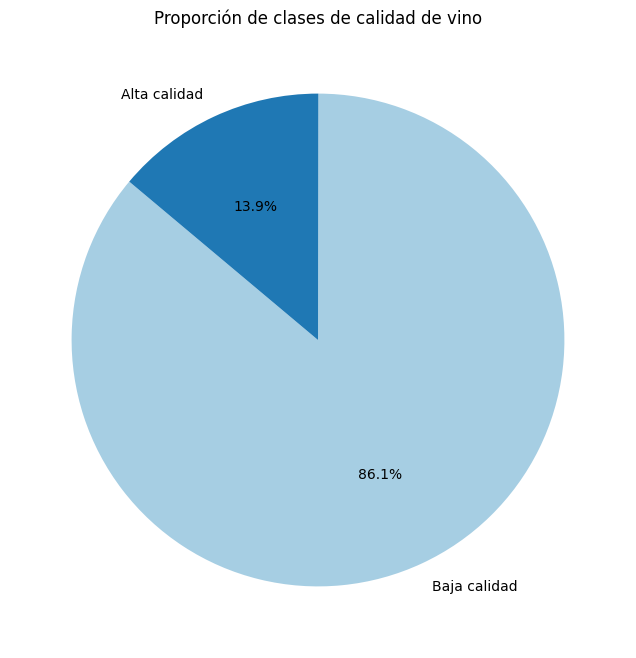

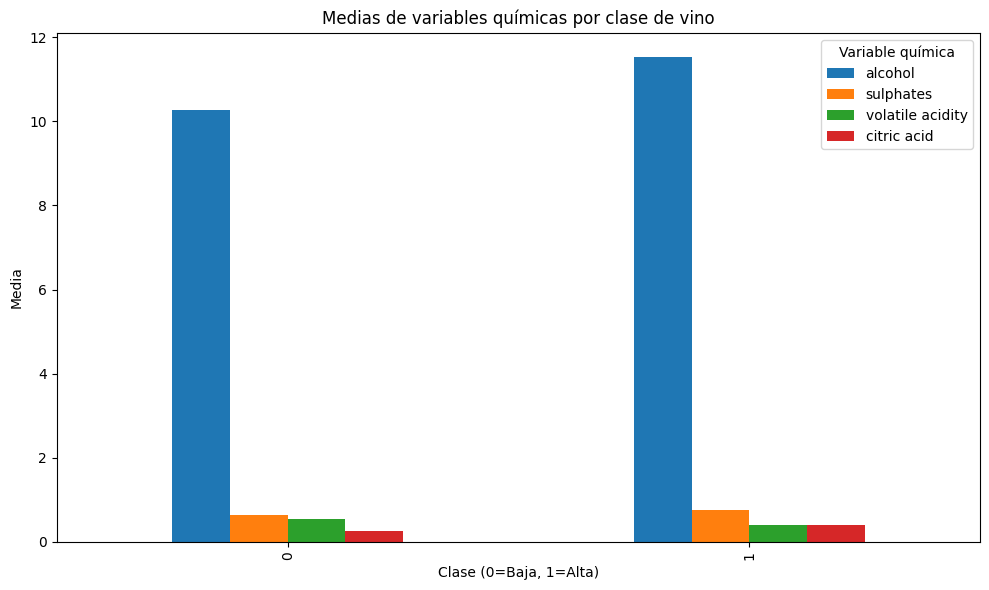

In [16]:
import matplotlib.pyplot as plt
# Gráfico circular de proporción de clases (target)
clase_counts = df['target'].value_counts().sort_index()
plt.figure(figsize=(8,8))
plt.pie(clase_counts, labels=['Baja calidad','Alta calidad'], autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Proporción de clases de calidad de vino')
plt.show()

# Gráfico de barras comparativo de medias de variables químicas por clase
variables_quimicas = ['alcohol', 'sulphates', 'volatile acidity', 'citric acid']
medias = df.groupby('target')[variables_quimicas].mean()
medias.plot(kind='bar', figsize=(10,6))
plt.title('Medias de variables químicas por clase de vino')
plt.xlabel('Clase (0=Baja, 1=Alta)')
plt.ylabel('Media')
plt.legend(title='Variable química')
plt.tight_layout()
plt.show()